1.       Cargue en un Dataframe los datos de los accidentes de los últimos 3 años

In [3]:
import pandas as pd

d20 = pd.read_csv("../input/atus_anual_2020.csv", header = 0, index_col=False)
d21 = pd.read_csv("../input/atus_anual_2021.csv", header = 0, index_col=False)   
d22 = pd.read_csv("../input/atus_anual_2022.csv", header = 0, index_col=False)


#lista de datasets para concatenar en un solo frame
frames = [d20, d21, d22]

ds = pd.concat(frames)

ds.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2020,1,0,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2020,1,0,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2020,1,0,10,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2020,1,2,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
4,Municipal,1,1,2020,1,2,10,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


2.       Agregue una columna tipo date que englobe las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [4]:

# Ajustes a la columna de hora
ds['ID_HORA'] = ds['ID_HORA'].apply(lambda x: x if x <= 23 else 0)

# Ajustes a la columna de minuto
ds['ID_MINUTO'] = ds['ID_MINUTO'].apply(lambda x: x if x < 60 else 0)

# Ajustes a la columna de mes
ds['MES'] = ds['MES'].apply(lambda x: x if isinstance(x, int) and 1 <= x <= 12 else 1)

# Ajustes a la columna de dia
ds['ID_DIA'] = ds['ID_DIA'].apply(lambda x: x if isinstance(x, int) and 1 <= x <= 31 else 1)

# creacion de la columna datetime
ds['registro_fecha'] = pd.to_datetime(ds['ANIO'].astype(str) + '-' +
                                      ds['MES'].astype(str) + '-' + 
                                      ds['ID_DIA'].astype(str) + ' ' + 
                                      ds['ID_HORA'].astype(str) + ':' + 
                                      ds['ID_MINUTO'].astype(str), errors='coerce')



In [ ]:
print(ds[['ANIO', 'MES', 'ID_DIA', 'ID_HORA', 'ID_MINUTO', 'registro_fecha']])


        ANIO  MES  ID_DIA  ID_HORA  ID_MINUTO      registro_fecha
0       2020    1       1        0          0 2020-01-01 00:00:00
1       2020    1       1        0          0 2020-01-01 00:00:00
2       2020    1       1        0         10 2020-01-01 00:10:00
3       2020    1       1        2          0 2020-01-01 02:00:00
4       2020    1       1        2         10 2020-01-01 02:10:00
...      ...  ...     ...      ...        ...                 ...
392705  2022   12      30        7         45 2022-12-30 07:45:00
392706  2022   12      30        8          0 2022-12-30 08:00:00
392707  2022   12      30       17         20 2022-12-30 17:20:00
392708  2022   12      31       14         45 2022-12-31 14:45:00
392709  2022   12      31       22         15 2022-12-31 22:15:00

[1067071 rows x 6 columns]


3.       Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [6]:
ds['area'] = ds['URBANA'].apply(lambda x: 'Suburana' if x == 'Sin accidente en esta zona' else 'Urbana')

In [ ]:
print(ds[['URBANA', 'SUBURBANA', 'area']])

                           URBANA                   SUBURBANA    area
0       Accidente en intersección  Sin accidente en esta zona  Urbana
1       Accidente en intersección  Sin accidente en esta zona  Urbana
2       Accidente en intersección  Sin accidente en esta zona  Urbana
3       Accidente en intersección  Sin accidente en esta zona  Urbana
4       Accidente en intersección  Sin accidente en esta zona  Urbana
...                           ...                         ...     ...
392705  Accidente en intersección  Sin accidente en esta zona  Urbana
392706  Accidente en intersección  Sin accidente en esta zona  Urbana
392707  Accidente en intersección  Sin accidente en esta zona  Urbana
392708  Accidente en intersección  Sin accidente en esta zona  Urbana
392709  Accidente en intersección  Sin accidente en esta zona  Urbana

[1067071 rows x 3 columns]


4.       Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [8]:
ds['zona'] = ds.apply(lambda x: x['SUBURBANA'] if x['URBANA'] == 'Sin accidente en esta zona' else x['URBANA'], axis=1)

In [ ]:
print(ds[['area', 'zona']])

          area                       zona
0       Urbana  Accidente en intersección
1       Urbana  Accidente en intersección
2       Urbana  Accidente en intersección
3       Urbana  Accidente en intersección
4       Urbana  Accidente en intersección
...        ...                        ...
392705  Urbana  Accidente en intersección
392706  Urbana  Accidente en intersección
392707  Urbana  Accidente en intersección
392708  Urbana  Accidente en intersección
392709  Urbana  Accidente en intersección

[1067071 rows x 2 columns]


5.       Elimine las columnas URBANA y SUBURBANA

In [10]:
ds.drop(columns=['URBANA', 'SUBURBANA'], inplace=True)

In [11]:
ds.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,registro_fecha,area,zona
0,Municipal,1,1,2020,1,0,0,1,Miercoles,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2020-01-01 00:00:00,Urbana,Accidente en intersección
1,Municipal,1,1,2020,1,0,0,1,Miercoles,Colisión con objeto fijo,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2020-01-01 00:00:00,Urbana,Accidente en intersección
2,Municipal,1,1,2020,1,0,10,1,Miercoles,Colisión con motocicleta,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2020-01-01 00:10:00,Urbana,Accidente en intersección
3,Municipal,1,1,2020,1,2,0,1,Miercoles,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2020-01-01 02:00:00,Urbana,Accidente en intersección
4,Municipal,1,1,2020,1,2,10,1,Miercoles,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2020-01-01 02:10:00,Urbana,Accidente en intersección


6.       Determine cual municipio de cada estado tuvo más meses sin accidentes

In [12]:

# Filtrar los datos para incluir solo las filas donde ocurrieron accidentes con "certificado cero"
# se agrupa por entidad y municipio
cert_cero = ds[ds['CLASACC'] == 'Certificado cero'].groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size().reset_index(name='count')


# Para cada estado, encontrar el municipio con el mayor número de meses sin accidentes
idx = cert_cero.groupby('ID_ENTIDAD')['count'].idxmax()
municipio_max_meses_sin_accidentes_por_estado = cert_cero.loc[idx]

# Imprimir los resultados
print(municipio_max_meses_sin_accidentes_por_estado)


      ID_ENTIDAD  ID_MUNICIPIO  count
3              1             9     17
5              3             2      1
8              4             7     21
12             5             5     24
29             6             6      9
30             7             1     24
154            8            25     24
176           10            20     24
184           11             6     24
204           12            16     24
261           13             3     24
339           14             3     24
433           16             2     24
510           17            34      5
524           18            16     23
528           19             3     24
552           20             1     24
1110          21             1     24
1321          22            13     21
1324          24             1     24
1372          25             5      5
1377          26             1     24
1429          27            11     17
1438          28             6     24
1503          29            46     24
1522        

7.       Resuma los accidentes del último año por tipo y que porcentaje representan

In [13]:
#accidemtes del 2022
ult_ano = ds[ds['ANIO'] == 2022]

# Agrupar los datos por tipo de accidente
resumen_accidentes = ult_ano.groupby('TIPACCID').size().reset_index(name='count')

# Calcular el total de accidentes
total_accidentes = resumen_accidentes['count'].sum()

# Calcular el porcentaje de cada tipo
resumen_accidentes['porcentaje'] = (resumen_accidentes['count'] / total_accidentes) * 100

In [14]:
print(resumen_accidentes)
print('total de accidentes en el año: ' + str(total_accidentes))

                                 TIPACCID   count  porcentaje
0                       Caída de pasajero    1784    0.454279
1                        Certificado cero   15479    3.941585
2                     Colisión con animal    1022    0.260243
3                   Colisión con ciclista    4048    1.030786
4                Colisión con ferrocarril     268    0.068244
5                Colisión con motocicleta   53629   13.656133
6                Colisión con objeto fijo   47033   11.976522
7   Colisión con peatón (atropellamiento)   11066    2.817855
8         Colisión con vehículo automotor  229940   58.552112
9                                Incendio     348    0.088615
10                                   Otro    6325    1.610603
11                      Salida del camino   10857    2.764635
12                              Volcadura   10911    2.778386
total de accidentes en el año: 392710


8.       Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [15]:

# accidentes de los últimos 3 años
accidentes = ds[ds['ANIO'].isin([2020, 2021, 2022])]
accidentes[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO', 
            'CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']] = \
accidentes[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO', 
            'CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].apply(pd.to_numeric, errors='coerce')


# Sumar la cantidad de muertos y lesionados 
cantidad_muertos = (accidentes['CONDMUERTO'].sum() + 
                   accidentes['PASAMUERTO'].sum() + 
                   accidentes['PEATMUERTO'].sum() + 
                   accidentes['CICLMUERTO'].sum() + 
                   accidentes['OTROMUERTO'].sum() +
                   accidentes['NEMUERTO'].sum())
cantidad_heridos = (accidentes['CONDHERIDO'].sum() + 
                       accidentes['PASAHERIDO'].sum() + 
                       accidentes['PEATHERIDO'].sum() + 
                       accidentes['CICLHERIDO'].sum() + 
                       accidentes['OTROHERIDO'].sum() +
                       accidentes['NEHERIDO'].sum())


print("Cantidad de muertos en los últimos 3 años:", str(cantidad_muertos))
print("Cantidad de heridos en los últimos 3 años:", str(cantidad_heridos))


Cantidad de muertos en los últimos 3 años: 13408
Cantidad de heridos en los últimos 3 años: 245902


9.       ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [16]:
acc_por_ano = ds.groupby('ANIO').size()
compare = acc_por_ano.pct_change() * 100

print("Variación en porcentaje de accidentes entre cada año y el anterior:")
print(compare)

Variación en porcentaje de accidentes entre cada año y el anterior:
ANIO
2020          NaN
2021    12.032536
2022    10.214277
dtype: float64


10. Seleccione una o dos características y haga una gráfica de cada una de las siguientes

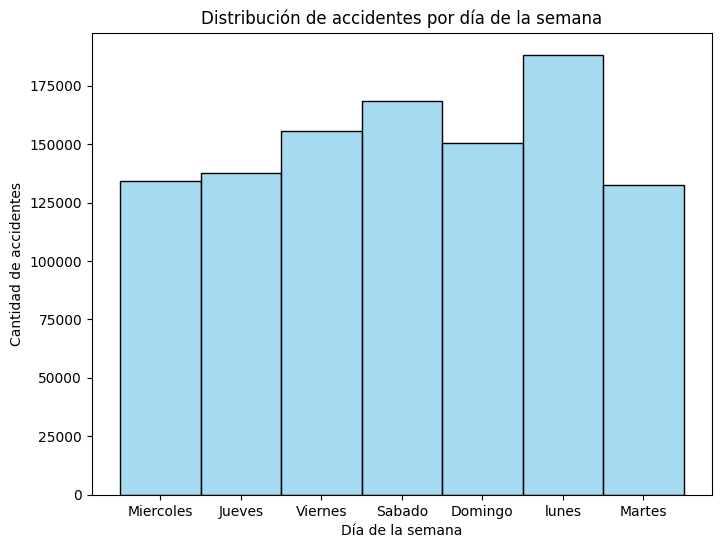

In [17]:
# Histograma
# Accidentes por dia de la semana

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(ds['DIASEMANA'], bins=7, kde=False, color='skyblue')
plt.title('Distribución de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.show()

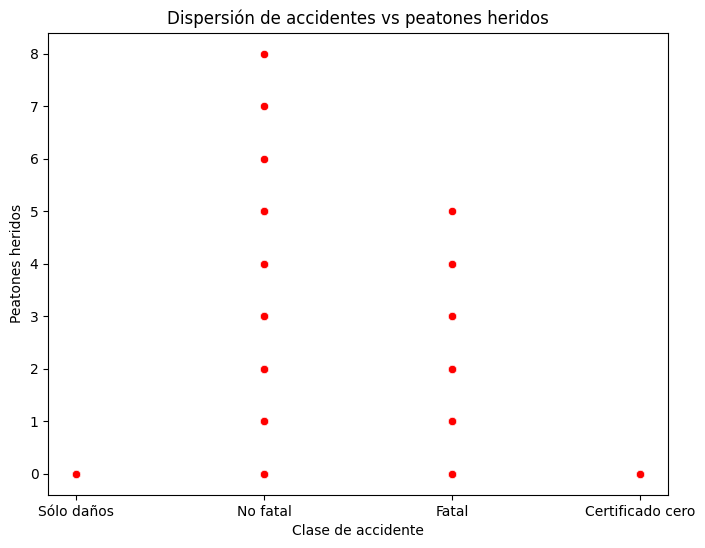

In [21]:
# Gráfico de dispersión entre la clase del accidente y peatones heridos

plt.figure(figsize=(8, 6))
sns.scatterplot(x='CLASACC', y='PEATHERIDO', data=ds, color='red')
plt.title('Dispersión de accidentes vs peatones heridos')
plt.xlabel('Clase de accidente')
plt.ylabel('Peatones heridos')
plt.show()

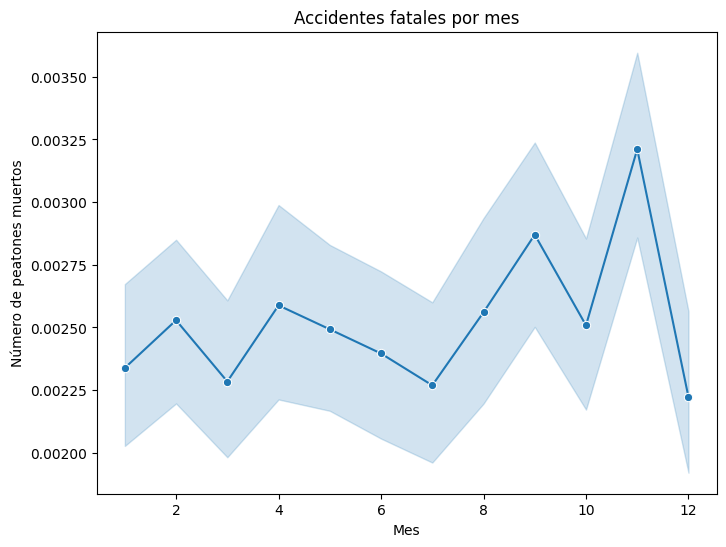

In [20]:
# Gráfico de línea de accidentes fatales por mes

plt.figure(figsize=(8, 6))
sns.lineplot(x='MES', y='PEATMUERTO', data=ds, marker='o')
plt.title('Accidentes fatales por mes')
plt.xlabel('Mes')
plt.ylabel('Número de peatones muertos')
plt.show()